# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.10000000149011612
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn to train !

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import numpy as np
import torch
import random

# Set initial random seed

seed = 1234

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
#torch.use_deterministic_algorithms(True)

print("Random number generator initialized with seed value:", seed)    

Random number generator initialized with seed value: 1234


In [7]:
%load_ext autoreload
%autoreload 2

from utilities import transpose_list, transpose_to_tensor
from buffer import ReplayBuffer
from p3_agent import MADDPG

replay_buffer_size = 5e5

maddpg = MADDPG(state_size, action_size, 
                tau=0.12,
                discount_factor=0.9999,
                gradient_clip=1.0,
                lr_actor=4.0e-5, 
                lr_critic=4.0e-4
               )

buffer = ReplayBuffer(int(replay_buffer_size)) 




Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 


In [8]:
from collections import deque 
import time

def train(number_of_episodes=3000, noise_scale=2.0,
         noise_reduction=0.9999, minibatch_size=1024):

    start_time = time.time()
    samples_added = 0
    scores_window = deque(maxlen=100)  # last 100 scores
    all_avg_scores = []
    for episode in range(number_of_episodes):

        # on a new episode: initialize agent, environment and scores
        maddpg.init_episode()
        env_info = env.reset(train_mode=True)[brain_name]
        observations = env_info.vector_observations
        scores = np.zeros(num_agents) 
        
        while True:
            # act using the current policy and exploration      
            actions = maddpg.act( torch.tensor(observations, dtype=torch.float), noise_scale )
            
            noise_scale *= noise_reduction
            actions = torch.stack(actions).detach().cpu().numpy()
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            next_observations = env_info.vector_observations         # get next state (for each agent)

            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            assert(dones[0]==dones[1])                         # it must be the same for all agents

            transition = (observations, actions, rewards, next_observations, dones) 
            buffer.push(transition)
            samples_added += 1
            
            observations = next_observations                   # roll over states to next time step
            scores += env_info.rewards                         # update the score (for each agent)
            
            if ( len(buffer)>minibatch_size ):    # and ( samples_added >= 3 ):     
                for agent in range(num_agents):
                    samples = buffer.sample(minibatch_size)
                    maddpg.update( samples, agent )
                maddpg.update_targets()                            #soft update the target network towards the actual networks 
                samples_added = 0
                
            if np.any(dones):                                  # exit loop if episode finished
                break
        scores_window.append(np.max(scores))
        all_avg_scores.append(scores)
        print('\rEpisode {}\tAvg score in 100 episodes: {:.4f} \tScore (max over agents) from last episode: {:.4f}'.format(episode, np.mean(scores_window), np.max(scores)), end="")
        if episode % 100 == 0:
            print('\rEpisode {}\tAvg score in 100 episodes: {:.4f} \tScore (max over agents) from last episode: {:.4f} \t Elapsed time: {}'.format(episode, np.mean(scores_window), np.max(scores), time.time() - start_time))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(episode, np.mean(scores_window)))
            torch.save(maddpg.maddpg_agent[0].actor.state_dict(), "agent0_actor_net.pth")
            torch.save(maddpg.maddpg_agent[0].critic.state_dict(), "agent0_critic_net.pth")
            torch.save(maddpg.maddpg_agent[1].actor.state_dict(), "agent1_actor_net.pth")
            torch.save(maddpg.maddpg_agent[1].critic.state_dict(), "agent1_critic_net.pth")
            print("Model saved.")
            break
            
    return all_avg_scores


In [9]:
import time
start_time = time.time()

scores = train(number_of_episodes = 10000,     #100
               noise_scale = 1.0,           # (starting) amplitude of noise
               noise_reduction = 0.9999,    # after each episode decrease the noise scale 
               minibatch_size = 512
)
elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time, "seconds.")


Episode 0	Avg score in 100 episodes: 0.0000 	Score (max over agents) from last episode: 0.0000 	 Elapsed time: 0.8319547176361084
Episode 100	Avg score in 100 episodes: 0.0030 	Score (max over agents) from last episode: 0.0000 	 Elapsed time: 35.67582058906555
Episode 200	Avg score in 100 episodes: 0.0000 	Score (max over agents) from last episode: 0.0000 	 Elapsed time: 81.94291687011719
Episode 300	Avg score in 100 episodes: 0.0000 	Score (max over agents) from last episode: 0.0000 	 Elapsed time: 127.65915036201477
Episode 400	Avg score in 100 episodes: 0.0019 	Score (max over agents) from last episode: 0.1000 	 Elapsed time: 174.52080130577087
Episode 500	Avg score in 100 episodes: 0.0268 	Score (max over agents) from last episode: 0.0000 	 Elapsed time: 241.089834690094
Episode 600	Avg score in 100 episodes: 0.0317 	Score (max over agents) from last episode: 0.0000 	 Elapsed time: 317.3477473258972
Episode 700	Avg score in 100 episodes: 0.0500 	Score (max over agents) from last ep

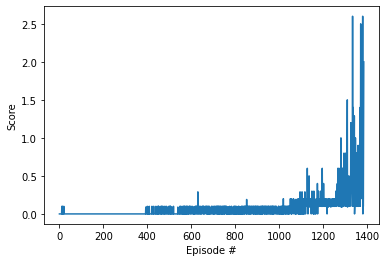

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), np.max(scores, axis=1)) 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [11]:
scores_transposed = np.transpose(scores)

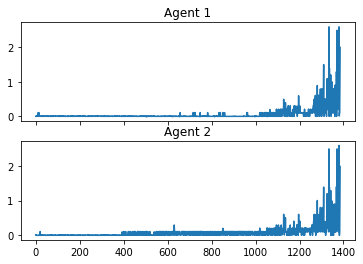

In [12]:
# plot the scores of each different agents
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(np.arange(len(scores_transposed[0])), scores_transposed[0])
ax1.set_title("Agent 1")
ax2.plot(np.arange(len(scores_transposed[1])), scores_transposed[1])
ax2.set_title("Agent 2")
plt.show()
              

### 5. Test the trained agents.

And now, try out a few game simulations with our new, trained agents !  

First,  create an empty, random model instance, then load the agent data from filesystem to check and ensure that everything necessary about our trained model is stored correctly in persistent storage.

In [13]:
maddpg = MADDPG(state_size, action_size)

maddpg.maddpg_agent[0].actor.load_state_dict(torch.load("agent0_actor_net.pth"))
maddpg.maddpg_agent[1].actor.load_state_dict(torch.load("agent1_actor_net.pth"))
         
print("Trained networks loaded successfully.")

Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Creating actor model using Linear layers in the following configuration: 24 -> 256 -> 128 -> 2 
Creating critic model using Linear layers in the following configuration: 52 -> 256 -> 64 -> 1 
Trained networks loaded successfully.


And now, let's play 10 episodes, and calculate the average score.

In [14]:
all_scores = []
for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = maddpg.act( torch.tensor(states, dtype=torch.float), 0.0 )     # no noise, don't need exploration   
        actions = torch.stack(actions).detach().cpu().numpy()
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1            
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
    all_scores.append(np.max(scores))


Score (max over agents) from episode 1: 1.9000000283122063
Score (max over agents) from episode 2: 1.9000000283122063
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 2.0000000298023224
Score (max over agents) from episode 5: 0.10000000149011612
Score (max over agents) from episode 6: 0.9000000134110451
Score (max over agents) from episode 7: 2.600000038743019
Score (max over agents) from episode 8: 0.10000000149011612
Score (max over agents) from episode 9: 1.3900000229477882


In [15]:
np.mean(all_scores)

1.2211111295554373

It's above the +0.5 limit, so we are good.

When finished, you can close the environment.

In [16]:
env.close()